# Quantium Project Data Analysis Report




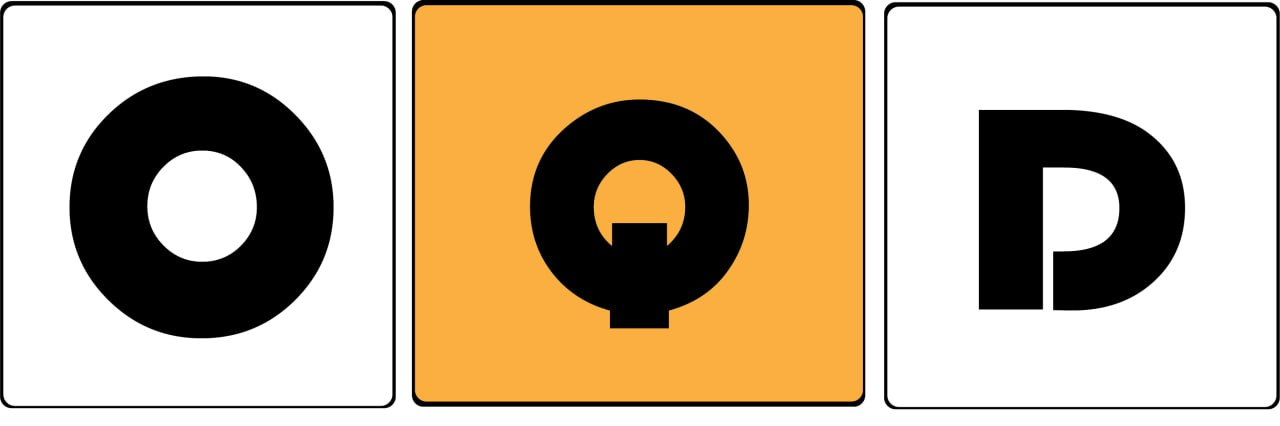

In [41]:
from IPython.display import Image

# Display image 
Image(filename= "OQD LOGO 2.jpg", height=600, width=400 )



## Introduction : 

This report provides an analysis of customer purchase behavior of a fictional chips company as well as transaction behaviour. Two datasets, **Q_Purchase_Behaviour** and **Q_Transaction_Data** , which can be accessed on [**Forage**](https://www.theforage.com) , under the _Quantium data analysis job simulation_, were used for this analysis. This project is a part of an intersnship program hosted by [***ONLY QUALITY DATA***](https://sites.google.com/onlyqualitydata.com/onlyqualitydata-internships/home)



## Objective :
The goal of this project is leverage Python to examine and clean transaction and customer data, identify customer segments based on purchasing behaviour, create charts and graphs and derive commercial recommendations from analyses.


## Dataset Overview :
### ***Q_Transaction_Data***

1. DATE : The date of the transaction, represented as a numeric format. Could be converted to an actual date.
2. STORE_NBR : The unique identifier for the store where the transaction took place.
3. LYLTY_CARD_NBR:	The loyalty card number of the customer, representing a unique customer identifier.
4. TXN_ID :	The unique transaction ID for each purchase.
5. PROD_NBR	: The unique product number identifying the specific product purchased.
6. PROD_NAME : The name of the product purchased, including the product description and pack size.
7. PROD_QTY : 	The quantity of the product purchased in the transaction.
8. TOT_SALES : The total sales value in dollars for the specific transaction and product.


### ***Q_Purchase_Behaviour*** : 

1. LIFESTAGE:  This column categorizes customers based on their stage in life, such as whether they are singles, couples, or families, and whether they are young, middle-aged, or retired."
2. PREMIUM_CUSTOMER : This column indicates the spending category of the customer, which can help understand their purchasing behavior based on whether they are more budget-conscious, mainstream, or premium shoppers.
3. LYLTY_CARD_NBR : The loyalty card number of the customer, representing a unique customer identifier.


		


### Data Inspection and Cleaning

In [5]:
#import python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Load Purchase Behaviour Dataset 
customer_df= pd.read_excel("Q_Purchase_Behaviour.xlsx")

#Load Customer Transactions Dataset
transactions_df= pd.read_excel("Q_Transaction_Data.xlsx")

In [7]:
#Display first 5 rows of the customer details df
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [8]:
#Display first 5 rows of the transaction df
transactions_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
# check for nulls in customer dataset
customer_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [10]:
# check for nulls in transactions dataset
transactions_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [11]:
# check for info on the transactions dataset
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [12]:
# preliminary analysis on data
customer_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [13]:
transactions_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [14]:
row_count = len(customer_df)
#len(customer_df.columns)
print("Number of rows in the customer table: ", row_count)

Number of rows in the customer table:  72637


In [15]:
#sorting the tables according to Total Salses
transactions_df.sort_values(by='TOT_SALES', ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
...,...,...,...,...,...,...,...,...
259695,2018-11-13,41,41089,38002,76,Woolworths Medium Salsa 300g,1,1.5
259707,2018-10-18,41,41267,38201,76,Woolworths Medium Salsa 300g,1,1.5
197005,2018-08-11,167,167121,168928,76,Woolworths Medium Salsa 300g,1,1.5
216449,2019-03-01,264,264032,262778,76,Woolworths Medium Salsa 300g,1,1.5


**We can observe transactions that can be determined to be  outliers**

In [16]:
#removing the rows with outiler. != means not equal to 200
transactions_df = transactions_df[transactions_df['PROD_QTY'] != 200]
transactions_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [17]:
# verifying changes
transactions_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [18]:
#merging both tables using the loyalty card number as reference
merged_df = pd.merge(transactions_df, customer_df, on='LYLTY_CARD_NBR')
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [19]:
merged_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [20]:
'''We are changing the data type of store number to make sure it is not recognised as a number.
This is helpful for visualisation.'''

merged_df["STORE_NBR"]= merged_df["STORE_NBR"].astype(str)
merged_df["STORE_NBR"].info()

<class 'pandas.core.series.Series'>
Int64Index: 264834 entries, 0 to 264833
Series name: STORE_NBR
Non-Null Count   Dtype 
--------------   ----- 
264834 non-null  object
dtypes: object(1)
memory usage: 4.0+ MB


After the conversion, STORE_NBR now has the data type *object*, indicating that it is treated as a string in Pandas. This change confirms that STORE_NBR is no longer being interpreted as a numeric type, which is helpful if you want it to be treated as a categorical variable in visualizations and analyses.

### Calculating key Measures

In [21]:
total_sales = transactions_df['TOT_SALES'].sum()
print ("Total Sales is ", total_sales, "dollars")

total_Qty = transactions_df['PROD_QTY'].sum()
print ("Total Quanty sold is ", total_Qty, "units")

total_members = customer_df['LYLTY_CARD_NBR'].nunique()
print("Total Members is ", total_members)

Total Sales is  1933115.0000000002 dollars
Total Quanty sold is  504724 units
Total Members is  72637


In [36]:
#displaying total sales by category and top 5 products
total_sales_by_category = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_5_products = total_sales_by_category.sort_values(by='TOT_SALES', ascending=False).head(5)
top_5_products


,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,39052.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
33,Kettle Mozzarella Basil & Pesto 175g,34457.4
76,Smiths Crinkle Original 330g,34302.6


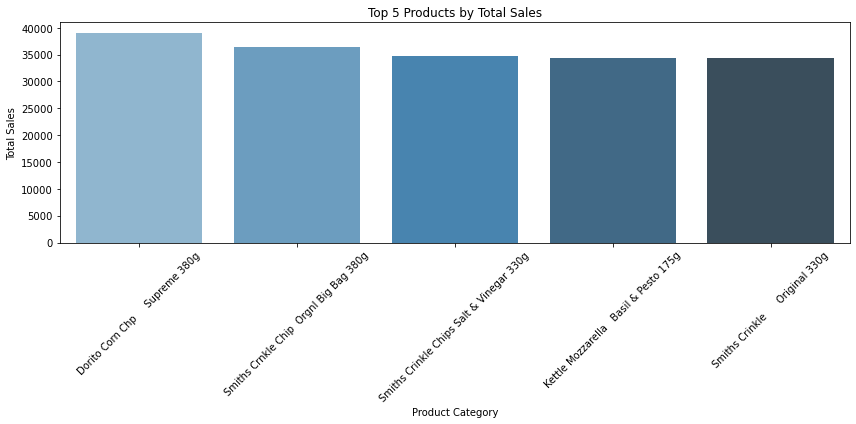

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='PROD_NAME', y='TOT_SALES', data=top_5_products, palette='Blues_d')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Top 5 Products by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# Calculate the value counts for the PREMIUM_CUSTOMER column
premium_customer_counts = customer_df['PREMIUM_CUSTOMER'].value_counts()
premium_customer_counts

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

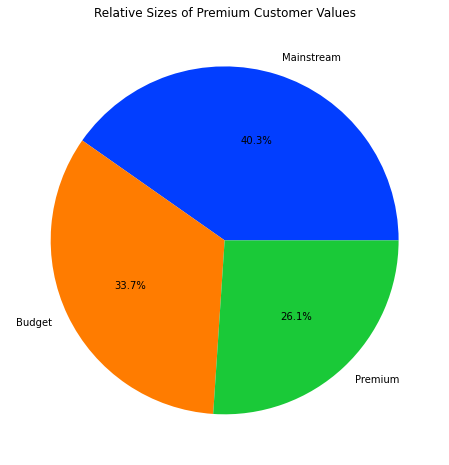

In [25]:
plt.figure(figsize=(8,8))

premium_customer_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('bright'))
#premium_customer_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright'))

plt.title('Relative Sizes of Premium Customer Values')
plt.ylabel('')  # Removes the default ylabel
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

In [43]:
# Calculate total sales sold by store
total_sales_by_store = merged_df.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()

# Sort by total sales and get the top 5 stores
top_5_stores_by_sales = total_sales_by_store.sort_values(by='TOT_SALES', ascending=False).head(5)
top_5_stores_by_sales


,STORE_NBR,TOT_SALES
141,226,17605.45
259,88,16333.25
73,165,15973.75
207,40,15559.50
153,237,15539.50


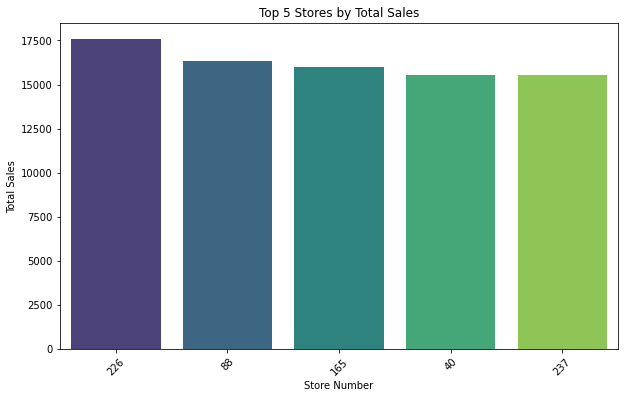

In [27]:
# Plotting the bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='STORE_NBR', y='TOT_SALES', data=top_5_stores_by_sales, palette='viridis')

plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Top 5 Stores by Total Sales')
plt.xticks(rotation=45)
#plt.tight_layout() # This is added to help with organisation


plt.show()

In [44]:
# Calculate total quantity sold by store
total_qty_by_store = merged_df.groupby('STORE_NBR')['PROD_QTY'].sum().reset_index()

# Sort by total quantity and get the top 5 stores
top_5_stores_by_qty = total_qty_by_store.sort_values(by='PROD_QTY', ascending=False).head(5)
print(top_5_stores_by_qty)

    STORE_NBR  PROD_QTY
141       226      4001
259        88      3718
265        93      3639
73        165      3602
210        43      3519


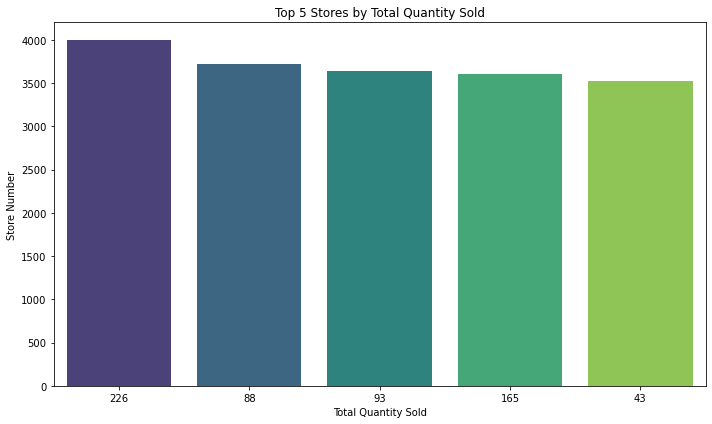

In [29]:
# Set up the plot size
plt.figure(figsize=(10, 6))

sns.barplot(y='PROD_QTY', x='STORE_NBR', data=top_5_stores_by_qty, palette='viridis')

# Add a title and labels
plt.title('Top 5 Stores by Total Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Store Number')

# Ensure optimal layout
plt.tight_layout()

# Show the plot
plt.show()

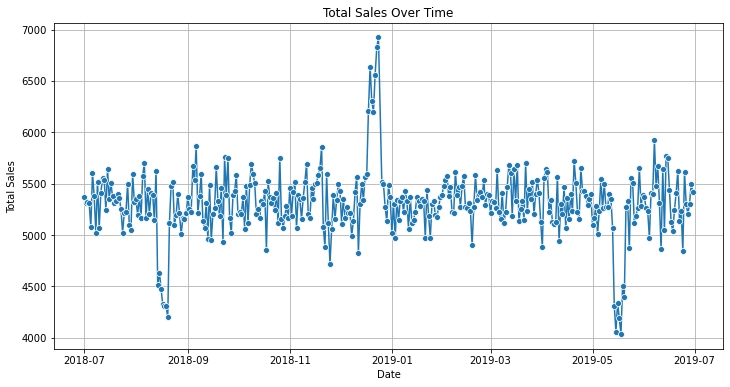

In [30]:
# Calculate total sales over time
sales_over_time = merged_df.groupby('DATE')['TOT_SALES'].sum().reset_index()

# Plotting the line chart with Seaborn
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='TOT_SALES', data=sales_over_time, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.grid(True)
#plt.tight_layout()

# Show the plot
plt.show()

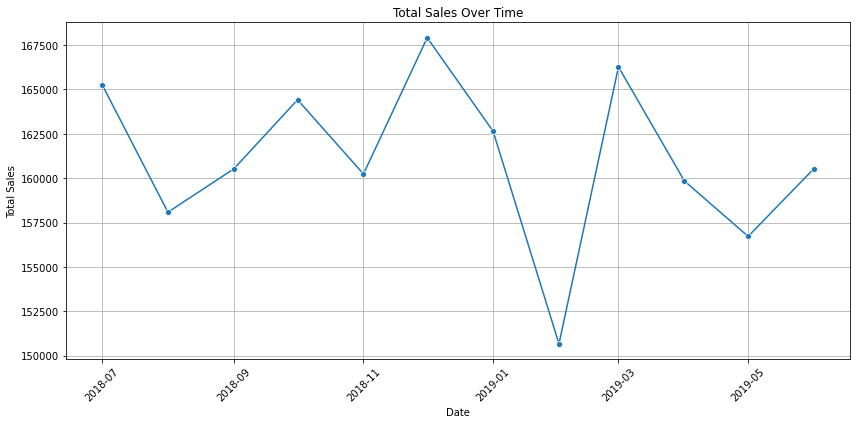

In [31]:
# Create 'MONTH_YEAR' column as datetime (using the first day of each month)
merged_df['MONTH_YEAR'] = merged_df['DATE'].dt.to_period('M').dt.to_timestamp()

# Calculate total sales over time
new_sales_over_time = merged_df.groupby('MONTH_YEAR')['TOT_SALES'].sum().reset_index()

# Plotting the line chart with Seaborn
plt.figure(figsize=(12,6))
sns.lineplot(x='MONTH_YEAR', y='TOT_SALES', data=new_sales_over_time, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [46]:

new_sales_over_time

,MONTH_YEAR,TOT_SALES
0,2018-07-01,165275.30
1,2018-08-01,158081.05
2,2018-09-01,160522.00
3,2018-10-01,164415.70
4,2018-11-01,160233.70
5,2018-12-01,167913.40
6,2019-01-01,162642.30
7,2019-02-01,150665.00
8,2019-03-01,166265.20
9,2019-04-01,159845.10


In [48]:
# Calculate total sales per lifestage
sales_lifestage = merged_df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# sort in descending order
sales_lifestage.sort_values(by='TOT_SALES', ascending= False)

,LIFESTAGE,TOT_SALES
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
2,OLDER FAMILIES,352467.20
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45


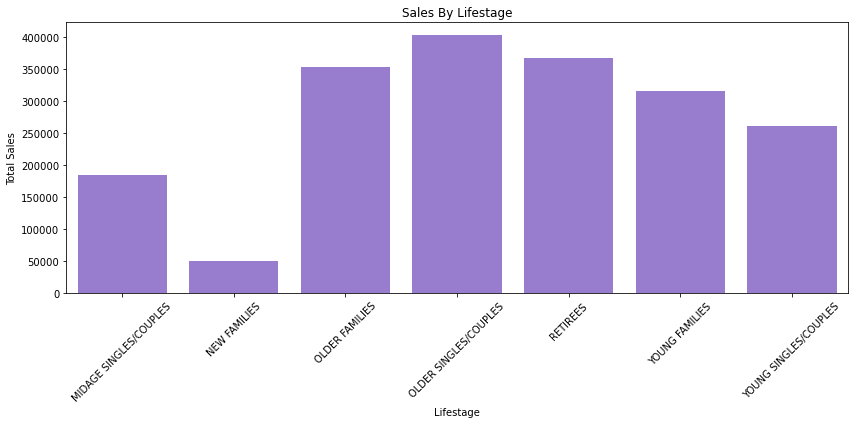

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=sales_lifestage, color='mediumpurple')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.title('Sales By Lifestage')
plt.xticks(rotation=45)
plt.tight_layout()

### Insights and Analysis



## 1. Key Measures

- **Total Sales**: $1,933,115
- **Total Quantity Sold**: 504,724 units
- **Total Unique Customers**: 72,637

---

## 2. Top Products by Sales

The five products with the highest sales revenue are:

| Product Name                               | Total Sales ($) |
|--------------------------------------------|-----------------|
| Dorito Corn Chip Supreme 380g              | 39,052          |
| Smiths Crinkle Chip Original Big Bag 380g  | 36,367.6        |
| Smiths Crinkle Chips Salt & Vinegar 330g   | 34,804.2        |
| Kettle Mozzarella Basil & Pesto 175g       | 34,457.4        |
| Smiths Crinkle Original 330g               | 34,302.6        |

---

## 3. Customer Count by Spending Category

Customer count per spending category:

| Category   | Customer Count |
|------------|----------------|
| Mainstream | 29,245         |
| Budget     | 24,470         |
| Premium    | 18,922         |

---

## 4. Top Stores by Sales and Quantity

### Sales Leaders

| Store Number | Total Sales ($) |
|--------------|-----------------|
| Store 226    | 17,605.45       |
| Store 88     | 16,333.25       |
| Store 165    | 15,973.75       |
| Store 40     | 15,559.50       |
| Store 237    | 15,539.50       |

### Quantity Leaders

| Store Number | Quantity Sold (Units) |
|--------------|-----------------------|
| Store 226    | 4,001                 |
| Store 88     | 3,718                 |
| Store 93     | 3,639                 |
| Store 165    | 3,602                 |
| Store 43     | 3,519                 |

---

## 5. Monthly Sales Trends :

Sales peaked in December 2018 at 167,913.4,  likely due to holiday season demand. A significant drop occurred in February 2019 with $150,665, which could be attributed to post-holiday spending patterns.



---

## 6. Sales Breakdown by Life Stage

Analysis by life stage revealed the following sales breakdown:

| Life Stage              | Total Sales ($) |
|-------------------------|-----------------|
| Older Singles/Couples   | 402,426.75      |
| Retirees                | 366,470.90      |
| Older Families          | 352,467.20      |
| Young Families          | 316,160.10      |
| Young Singles/Couples   | 260,405.30      |
| Mid-Age Singles/Couples | 184,751.30      |
| New Families            | 50,433.45       |

**Key Insight**: Older singles/couples and retirees are the primary contributors to sales, making them key customer segments.

---



## 7. Recommendations

### **Product Focus:**
- **Increase Inventory of Top-Selling Products**:  
  Based on sales data, the top-performing products like **Dorito Corn Chip Supreme 380g**, **Smiths Crinkle Chip Original Big Bag 380g**, and **Kettle Mozzarella Basil & Pesto 175g** contribute significantly to total revenue. To capitalize on this, stores should prioritize stocking these high-demand products. This can help avoid stockouts, ensuring that these popular items remain available to customers, especially during peak shopping times (e.g., holidays or weekends).  
  - **Actionable Insight**: Work with supply chain management to forecast demand more accurately for these products, and increase orders to top-performing stores such as **Store 226** and **Store 88**, where these items have historically sold well.

### **Targeted Marketing:**
- **Focus Advertising on Key Customer Segments**:  
  The **older singles/couples** and **retirees** are the highest contributors to overall sales, accounting for a significant portion of revenue. These groups likely have more disposable income and may prioritize quality and convenience in their purchases. Tailoring marketing campaigns specifically to these segments can further boost sales.  
  - **Actionable Insight**: Develop targeted digital and traditional advertising campaigns that highlight the health benefits, premium quality, or convenience of the products. For instance, ads can be tailored to appeal to **older singles/couples** who may prefer easy-to-prepare snacks or **retirees** who may appreciate traditional or nostalgic snack flavors.
  - **Platform Recommendation**: Consider using platforms such as Facebook and television, which tend to reach an older demographic more effectively.

### **Promotions for Premium Customers:**
- **Tailor Promotions to "Premium" Customers**:  
  The **Premium** customer segment, although smaller than the mainstream and budget categories, is likely to spend more per transaction. These customers may be attracted to higher-end or niche products, and personalized promotions could encourage repeat purchases and boost average transaction value.  
  - **Actionable Insight**: Design exclusive promotions, such as "Buy One, Get One Free" or discount offers, that cater specifically to the preferences of premium customers. For example, offer bundle deals that include higher-value items or limited-edition flavors, appealing to their sense of exclusivity.  
  - **Loyalty Programs**: Consider enhancing loyalty programs for this segment with rewards for higher spending, such as points-based systems where customers earn rewards for each purchase. This could help retain these high-value customers.

### **Store-Specific Strategies:**
- **Allocate More Inventory to High-Performing Stores**:  
  Stores such as **Store 226** and **Store 88** have demonstrated consistently high sales figures and purchase quantities. Ensuring that these stores have adequate inventory of high-demand products will help meet the demand and maximize potential revenue.  
  - **Actionable Insight**: Work with store managers to evaluate sales patterns and ensure that inventory replenishment is aligned with the demand for these stores. This may include setting higher minimum stock levels for best-selling products and monitoring trends to adjust inventory accordingly.
  
- **Targeted Promotions in High-Performing Stores**:  
  Given the success of specific stores in both total sales and quantity sold, localized promotions and marketing efforts can be deployed to increase customer engagement. For example, **Store 226** could host in-store events or offer exclusive deals for local customers.  
  - **Actionable Insight**: Offer limited-time discounts or bundle promotions that are exclusive to high-performing stores to increase foot traffic. Additionally, ensure that store employees are well-trained to promote these deals and engage with customers effectively.
